**Titanic Classification**

<u>Make a system which tells whether the person will
be save from sinking. What factors were most likely
lead to success-socio-economic status, age, gender
and more.</u>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd().replace("\\", "/")
filepath=os.path.join(pwd,"train.csv")
df=pd.read_csv(filepath)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [7]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]  # Add other relevant features
target = "Survived"

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(random_state=42)


In [10]:
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({"Feature": features, "Importance": model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
  Feature  Importance
5    Fare    0.300568
1     Sex    0.273294
2     Age    0.256716
0  Pclass    0.081660
3   SibSp    0.050145
4   Parch    0.037616


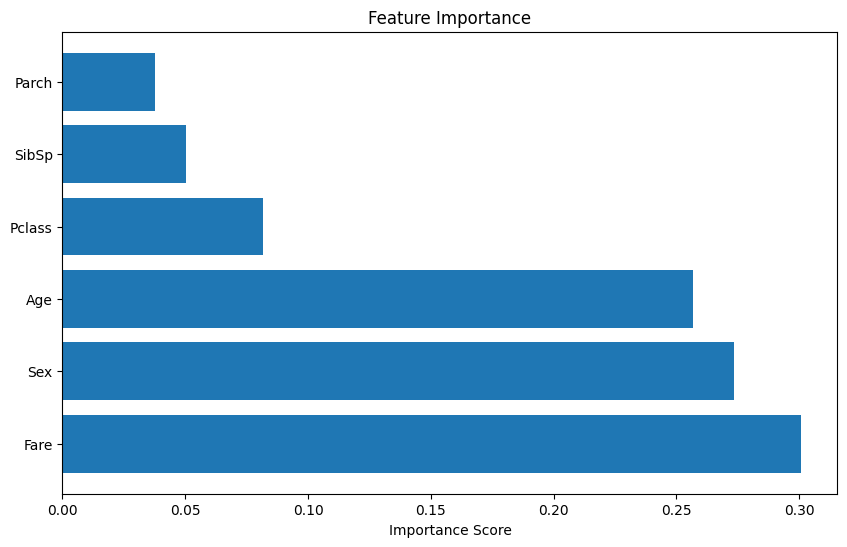

In [11]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()

In [12]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8044692737430168


In [13]:
new_data = {"Pclass": [2], "Sex": [1], "Age": [30], "SibSp": [1], "Parch": [0], "Fare": [25]}  # Add values for other features
new_df = pd.DataFrame(new_data)
prediction_new_data = model.predict(new_df)
print(f"Predicted Survival for New Data: {prediction_new_data}")

Predicted Survival for New Data: [1]
